## Fetching Dataset

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist=fetch_openml("mnist_784")


In [4]:
X, Y = mnist["data"].to_numpy(), mnist["target"].to_numpy()

In [5]:
X.shape

(70000, 784)

In [6]:
Y.shape

(70000,)

In [7]:
%matplotlib inline

In [8]:
import matplotlib
import matplotlib.pyplot as plt
# import numpy as np

In [9]:
some_digit = X[36001]
some_digit_image = some_digit.reshape(28,28)  #Lets reshape it to plot it

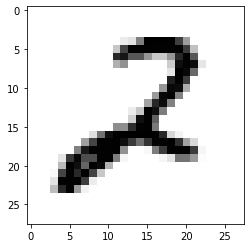

In [10]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='nearest')

In [11]:
Y[36001]

'2'

In [12]:
X_train,X_test=X[:60000],X[60000:]

In [13]:
Y_train,Y_test=Y[:60000],Y[60000:]

In [14]:
import numpy as np
shuffle_index=np.random.permutation(60000)
X_train,Y_train=X_train[shuffle_index],Y_train[shuffle_index]

## Creating a 2 Detector

In [15]:
Y_train=Y_train.astype(np.int8)
Y_test=Y_test.astype(np.int8)
Y_train_2=(Y_train==2)
Y_test_2=(Y_test==2)

In [16]:
Y_train

array([4, 4, 7, ..., 9, 9, 2], dtype=int8)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
clf=LogisticRegression(tol=0.1)

In [20]:
clf.fit(X_train,Y_train_2)


C:\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [21]:
clf.predict([some_digit])


array([ True])

## Cross validation

In [22]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(clf,X_train,Y_train_2,cv=3,scoring="accuracy")



C:\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [23]:
a.mean()

0.9783833333333334

In [24]:
from sklearn.model_selection import cross_val_predict
Y_train_pred=cross_val_predict(clf,X_train,Y_train_2,cv=3)

C:\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [25]:
Y_train_pred

array([False, False, False, ..., False, False,  True])

## Calculating confusion matrix

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
confusion_matrix(Y_train_2,Y_train_pred)

array([[53575,   467],
       [  830,  5128]], dtype=int64)

In [28]:
confusion_matrix(Y_train_2,Y_train_2) # this is the confusion matrix for perfect prediction

array([[54042,     0],
       [    0,  5958]], dtype=int64)

## Precision and score

In [29]:
from sklearn.metrics import precision_score,recall_score

In [30]:
precision_score(Y_train_2,Y_train_pred)

0.916532618409294

In [31]:
recall_score(Y_train_2,Y_train_pred)

0.860691507217187

## F1-Score

In [32]:
from sklearn.metrics import f1_score

In [33]:
f1_score(Y_train_2,Y_train_pred)

0.8877347875010819

## Presion recall curve

In [34]:
from sklearn.metrics import precision_recall_curve

In [38]:
Y_scores=cross_val_predict(clf,X_train,Y_train_2,cv=3,method="decision_function")

C:\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [39]:
Y_scores

array([ -4.69645388,  -4.17258323, -14.52637941, ...,  -4.78700309,
        -6.9933319 ,   2.18883517])

In [40]:
precisions,recalls,thresholds=precision_recall_curve(Y_train_2,Y_scores)

In [41]:
precisions

array([0.10128175, 0.10126647, 0.10126819, ..., 1.        , 1.        ,
       1.        ])

In [42]:
recalls

array([1.00000000e+00, 9.99832158e-01, 9.99832158e-01, ...,
       3.35683115e-04, 1.67841558e-04, 0.00000000e+00])

In [43]:
thresholds

array([-23.76835753, -23.75936843, -23.75716471, ...,  17.91625498,
        18.39618797,  18.93066752])

## Precision recall curve plotting

(0.0, 1.0)

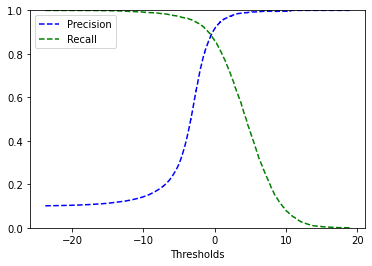

In [47]:
plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
plt.plot(thresholds,recalls[:-1],"g--",label="Recall")
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])